# Product analytics using Python

In [1]:
# Importing the necessary libraries and dataset

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('C:\\Users\\Zachary_B\\Desktop\\dataset\\Online Retail.xlsx', sheet_name='Online Retail')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


#### Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
df.shape

(541909, 8)

#### Data Cleaning

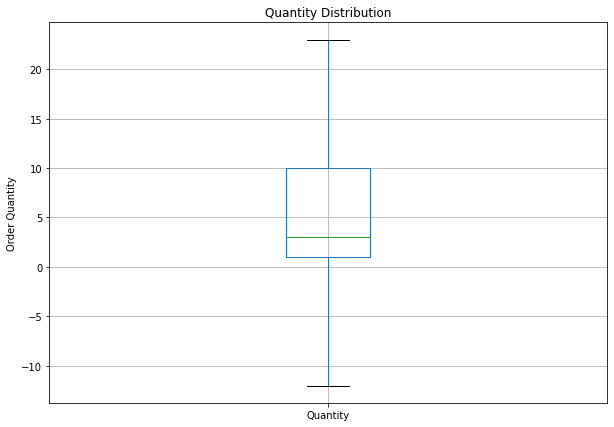

In [4]:
# Let's look quickly at the distribution of the Quantity column. 
ax = df['Quantity'].plot.box(showfliers=False,grid=True,figsize=(10, 7))
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()


As you can see from this plot, some orders have negative quantities. This is
because the cancelled or refunded orders are recorded with negative values in
the Quantity column of our dataset. For illustration purposes in this exercise,
we are going to disregard the cancelled orders.

# Time series trends


In [5]:
# We can filter out all the cancelled orders in our DataFrame by using the code below
df = df.loc[df['Quantity'] > 0]

In [6]:
# we are going to look into the numbers of orders received over time.
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [7]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

In [8]:
# All purchases per month
df.set_index('InvoiceDate')['InvoiceNo'].resample('M').count()

InvoiceDate
2010-12-31    41683
2011-01-31    34350
2011-02-28    27184
2011-03-31    35915
2011-04-30    29171
2011-05-31    36292
2011-06-30    36056
2011-07-31    38716
2011-08-31    34566
2011-09-30    49323
2011-10-31    59396
2011-11-30    83498
2011-12-31    25135
Freq: M, Name: InvoiceNo, dtype: int64

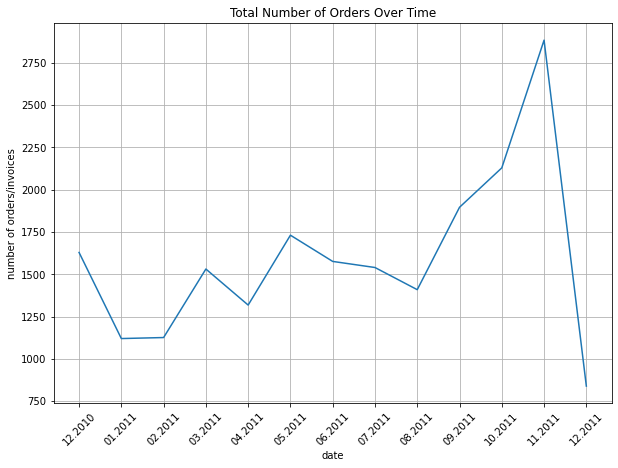

In [9]:
# vizualizing time series data using line chart
ax = pd.DataFrame(monthly_orders_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')
plt.xticks(
range(len(monthly_orders_df.index)),
[x.strftime('%m.%Y') for x in monthly_orders_df.index],
rotation=45
)
plt.show()


In [10]:
range(len(monthly_orders_df.index))

range(0, 13)

In [11]:
monthly_orders_df.index

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31'],
              dtype='datetime64[ns]', name='InvoiceDate', freq='M')

In [12]:
#From this chart is that there is a sudden radical drop in the number of orders in December 2011. We can verify this with the code

invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01','InvoiceDate']

print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))


Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [13]:
type(invoice_dates)

pandas.core.series.Series

In [14]:
# we removed invoice_date for December as it is would be a misrepresentation if we use this data for analyzing December sales and revenue.
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [15]:
# we are going to look into the numbers of orders received over time.
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

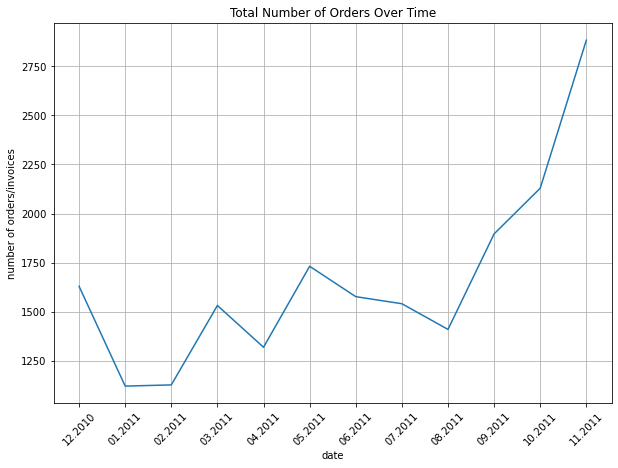

In [16]:
# vizualizing time series data using line chart
ax = pd.DataFrame(monthly_orders_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')
plt.xticks(
range(len(monthly_orders_df.index)),
[x.strftime('%m.%Y') for x in monthly_orders_df.index],
rotation=45
)
plt.show()

In [17]:
# Let's take a quick look at the monthly revenue data 
# As you can see from this code, the first thing we do here is to calculate the
# aggregate sales amount from each order

df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [18]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


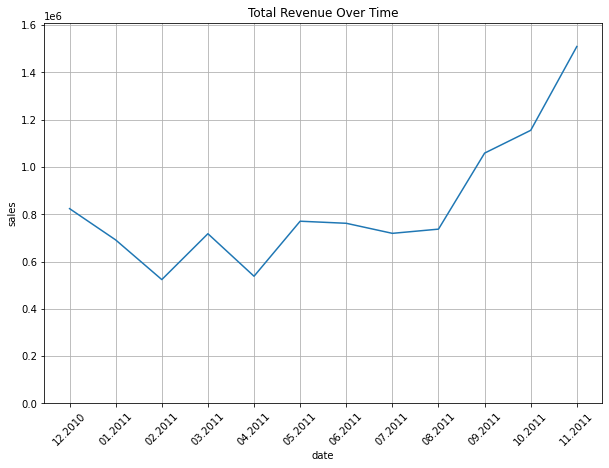

In [20]:
# plotting revenue vales
ax = pd.DataFrame(monthly_revenue_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(
range(len(monthly_revenue_df.index)),
[x.strftime('%m.%Y') for x in monthly_revenue_df.index],
rotation=45
)
plt.show()


# Repeat customers


In [21]:
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50


In [22]:
df.Sales[0:7].sum()

139.12

In [23]:
# Aggregate this raw data for each InvoiceNo(purchase order)
invoice_customer_df = df.groupby(
by=['InvoiceNo', 'InvoiceDate']).agg({'Sales': sum,'CustomerID': min,'Country': min}).reset_index()


In [24]:
df.Country.value_counts()

United Kingdom          462668
Germany                   8725
France                    8084
EIRE                      7561
Spain                     2420
Netherlands               2277
Switzerland               1967
Belgium                   1937
Portugal                  1400
Australia                 1185
Norway                     999
Italy                      750
Channel Islands            743
Finland                    672
Cyprus                     614
Sweden                     450
Unspecified                446
Austria                    391
Denmark                    369
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    171
Canada                     151
USA                        147
Malta                      112
Greece                     109
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [25]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [26]:
# we need to aggregate this data per month and compute the number of customers who made more than one purchase in a given month(repeat customers).
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [27]:
# You can use the following code to compute the total number of monthly customers:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [28]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [30]:
#You can use the following code to calculate the percentages of repeat customers for each month:
monthly_repeat_percentage =monthly_repeat_customers_df/monthly_unique_customers_df*100.0

In [31]:
monthly_repeat_percentage 

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

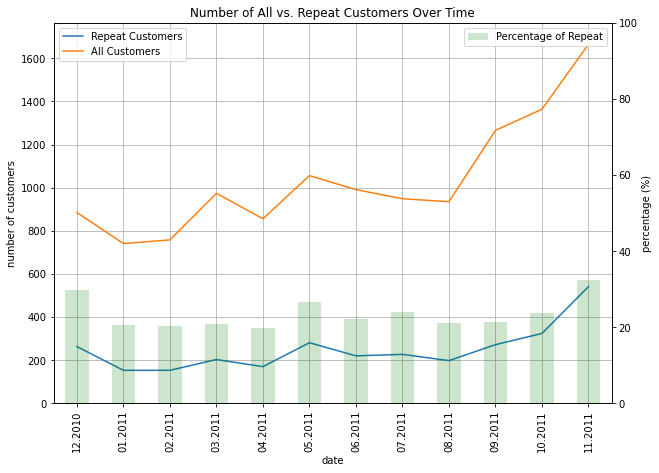

In [32]:
# Let's visualize all of this data in one chart:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
figsize=(10,7)
)
pd.DataFrame(monthly_unique_customers_df.values).plot(
ax=ax,
grid=True
)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
ax=ax,
grid=True,secondary_y=True,
color='green',
alpha=0.2
)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(
range(len(monthly_repeat_customers_df.index)),
[x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
rotation=45
)
plt.show()


In [34]:
#shows how to compute the monthly revenue from Repeat Customers
monthly_rev_repeat_customers_df =invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [35]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [36]:
monthly_rev_perc_repeat_customers_df 

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

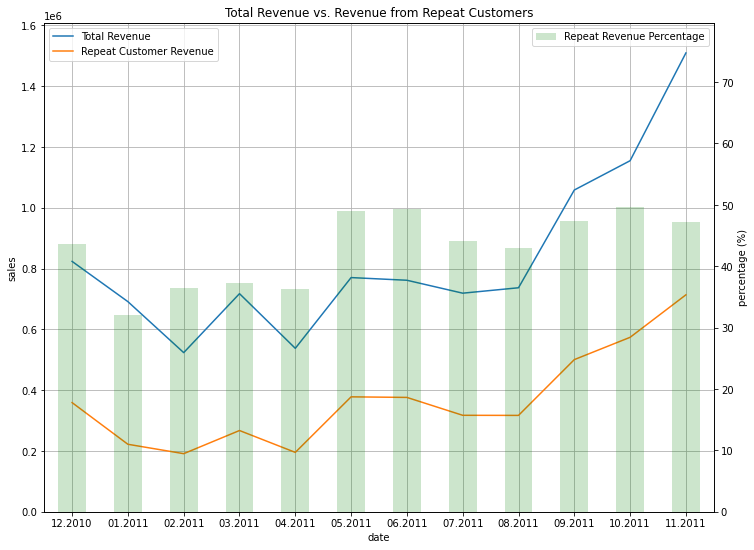

In [35]:
# for vizualization:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
ax=ax2,
kind='bar',
color='g',
alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Audi", "BMW", "Mercedes_-Benz",
         "Mistubishi", "Renault", "Toyota", "Volkswagen"]
    y = [419, 636, 820, 306,
         438, 509, 875]
addlabels(x, y)

plt.show()

In [ ]:
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696

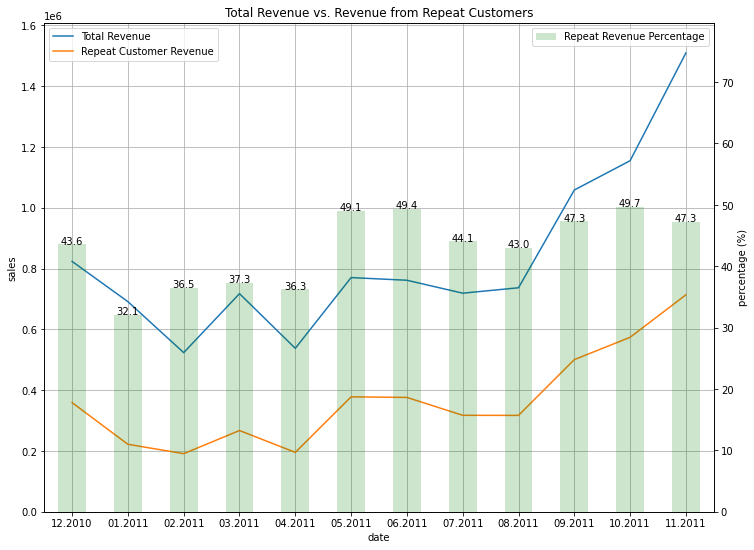

In [45]:
# for vizualization:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
ax=ax2,
kind='bar',
color='g',
alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

def addlabels(x,y):
    for i in range(len(x)):
       plt.text(i, y[i], y[i], ha = 'center')
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["2010-12-31", "2011-01-31", "2011-02-28", "2011-03-31", "2011-04-30", "2011-05-31",
         "2011-06-30", "2011-07-31", "2011-08-31", "2011-09-30", "2011-10-31", "2011-11-30 "]
    y = [43.6, 32.1, 36.5, 37.3, 36.3, 49.1,
          49.4, 44.1, 43.0, 47.3, 49.7, 47.3]
addlabels(x, y)

plt.show()

## Trending items over time


In [36]:
#let's count the number of items sold for each product for each period
date_item_df = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

In [37]:
date_item_df=pd.DataFrame(date_item_df)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [38]:
#let's see what items were sold the most on November 30, 2011.
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(by='Quantity', ascending=False).reset_index()

In [39]:
last_month_sorted_df 

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [40]:
# df.query("StockCode == '23084'")


In [44]:
# Regroup for top 5 items
# aggregating the monthly sales data for these five products
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

In [45]:
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [60]:
# transforming  this data into a tabular forma
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

In [61]:
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


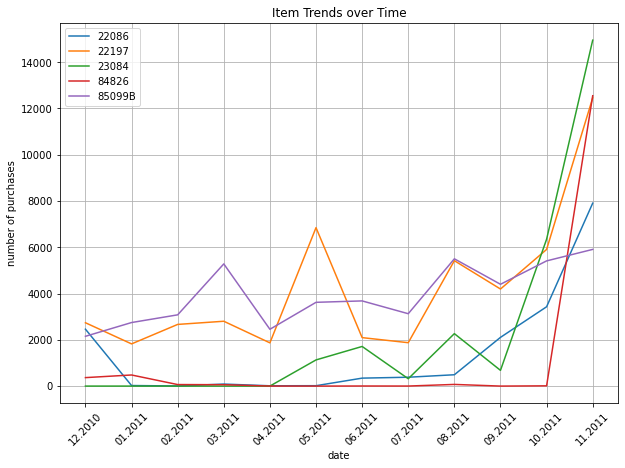

In [66]:
# building a time series plot for trending items

ax = pd.DataFrame(trending_itmes_df.values).plot(
figsize=(10,7),
grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_itmes_df.columns, loc='upper left')
# leg = ax.get_legend(),
# leg.legendHandles[0].set_color('red'),

plt.xticks(
range(len(trending_itmes_df.index)),
[x.strftime('%m.%Y') for x in trending_itmes_df.index],
rotation=45
)
plt.show()


In [63]:
ax

<AxesSubplot:title={'center':'Item Trends over Time'}, xlabel='date', ylabel='number of purchases'>